In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [4]:
#1. Data Prepration
# Generate synthetic data
np.random.seed(42)
X_train = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X_train + 2, X_train - 2]

X_test = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X_test + 2, X_test - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

In [5]:
# 2. Standardize the Data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_outliers = scaler.transform(X_outliers)

In [6]:
# 3. Model Training

# Initialize One-Class SVM
oc_svm = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.1)

# Train the model
oc_svm.fit(X_train)

OneClassSVM(gamma=0.1, nu=0.1)

In [7]:
# 4. Prediction and Evaluation

# Predict
y_pred_train = oc_svm.predict(X_train)
y_pred_test = oc_svm.predict(X_test)
y_pred_outliers = oc_svm.predict(X_outliers)

# Replace -1 with 0 for anomaly detection
y_pred_train = [0 if x == -1 else 1 for x in y_pred_train]
y_pred_test = [0 if x == -1 else 1 for x in y_pred_test]
y_pred_outliers = [0 if x == -1 else 1 for x in y_pred_outliers]

# True labels
y_true_train = [1] * len(y_pred_train)
y_true_test = [1] * len(y_pred_test)
y_true_outliers = [0] * len(y_pred_outliers)

# Combine predictions and true labels
y_true = y_true_train + y_true_test + y_true_outliers
y_pred = y_pred_train + y_pred_test + y_pred_outliers

# Print classification report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.50      0.36        20
           1       0.96      0.90      0.92       240

    accuracy                           0.87       260
   macro avg       0.62      0.70      0.64       260
weighted avg       0.90      0.87      0.88       260



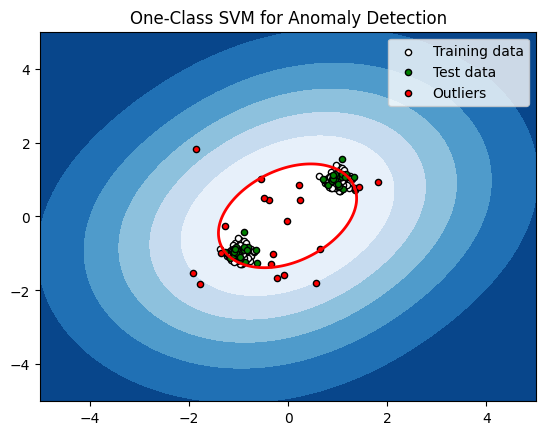

In [8]:
# 5. Visualization

# Create meshgrid for visualization
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = oc_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.title("One-Class SVM for Anomaly Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')

# Plot training data
plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=20, edgecolor='k', label='Training data')
# Plot test data
plt.scatter(X_test[:, 0], X_test[:, 1], c='green', s=20, edgecolor='k', label='Test data')
# Plot outliers
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', s=20, edgecolor='k', label='Outliers')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend()
plt.show()

In [9]:
# 6. Optimise Hyperparameters

from sklearn.model_selection import GridSearchCV

param_grid = {
    'kernel': ['rbf', 'poly', 'linear'],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'nu': [0.1, 0.5, 0.9]
}

grid_search = GridSearchCV(OneClassSVM(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train)
print(grid_search.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^

{'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.1}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [10]:
from sklearn.metrics import classification_report, roc_auc_score

y_true = [1]*len(X_test) + [0]*len(X_outliers)
y_pred = oc_svm.predict(np.vstack((X_test, X_outliers)))
y_pred = [0 if x == -1 else 1 for x in y_pred]

print(classification_report(y_true, y_pred))
print("ROC AUC Score:", roc_auc_score(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57        20
           1       0.78      0.88      0.82        40

    accuracy                           0.75        60
   macro avg       0.72      0.69      0.70        60
weighted avg       0.74      0.75      0.74        60

ROC AUC Score: 0.6875


In [11]:
# 7. Dimensionality Reduction

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_outliers_pca = pca.transform(X_outliers)

oc_svm.fit(X_train_pca)

OneClassSVM(gamma=0.1, nu=0.1)

# Source

- https://spotintelligence.com/2024/05/27/anomaly-detection-one-class-svm/